In [1]:
import numpy as np
import os
from surprise import Dataset
from surprise import Reader
import matplotlib.pyplot as plt

##QUESTION 1
print("-------------Question 1-------------")
#load data from ratings.csv      
file_path = os.path.expanduser('ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data_in_ratings = Dataset.load_from_file(file_path,reader=reader)

# compute the sparsity
user_id,count_user = np.unique([data[0] for data in data_in_ratings.raw_ratings],return_counts=True)   
movie_id,count_movie = np.unique([data[1] for data in data_in_ratings.raw_ratings],return_counts=True) 
ratings = np.array([data[2] for data in data_in_ratings.raw_ratings])

num_user = len(user_id)
num_movie = len(movie_id)
num_rating = len(ratings)
print(num_user,num_movie,num_rating)
sparsity = num_rating / (num_user * num_movie)
print('the sparsity value is : ',sparsity)

-------------Question 1-------------
610 9724 100836
the sparsity value is :  0.016999683055613623


-------------Question 2-------------


([<matplotlib.axis.XTick at 0x190f86b30f0>,
 <a list of 12 Text xticklabel objects>)

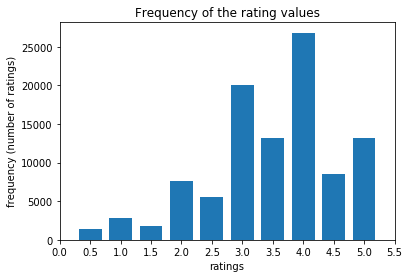

In [2]:
##QUESTION 2
print("-------------Question 2-------------")
bins = np.arange(0.25,5.75,0.5)
plt.hist(ratings, bins=bins, rwidth = 0.75)
plt.xlabel('ratings')
plt.ylabel('frequency (number of ratings)')
plt.title('Frequency of the rating values')
plt.xticks([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5])

-------------Question 3-------------


Text(0.5, 1.0, 'Distribution of the number of ratings received among movies')

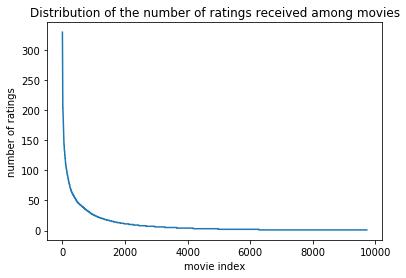

In [3]:
##QUESTION 3
print("-------------Question 3-------------")
# sort the count_movie array and make it in a decreasing order
num_movie_rating = count_movie[np.argsort(- count_movie)]

#plot the frequency
plt.plot(num_movie_rating)
plt.ylabel('number of ratings')
plt.xlabel('movie index')
plt.title('Distribution of the number of ratings received among movies')

-------------Question 4-------------


Text(0.5, 1.0, 'Distribution of the number of ratings received among users')

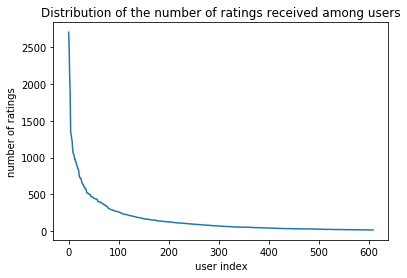

In [4]:
##QUESTION 4
print("-------------Question 4-------------")
# sort the count_user array and make it in a decreasing order
num_user_rating = count_user[np.argsort(- count_user)]
#plot the frequency
plt.plot(num_user_rating)
plt.ylabel('number of ratings')
plt.xlabel('user index')
plt.title('Distribution of the number of ratings received among users')

-------------Question 6-------------
(100836, 3)
(9724,)


C:\Users\andyx\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3157: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\andyx\Anaconda3\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\andyx\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(9724,)


Text(0.5, 1.0, '')

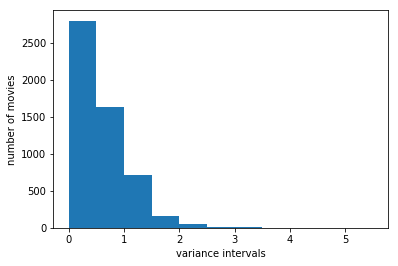

In [5]:
## QUESTION 6
print("-------------Question 6-------------")
# transfer the information in ratings.csv to numpy arrays
user_data = np.array([int(data[0]) for data in data_in_ratings.raw_ratings])
movie_data = np.array([int(data[1]) for data in data_in_ratings.raw_ratings])
ratings_data = np.array([float(data[2]) for data in data_in_ratings.raw_ratings])

# build a matrix
concat_data = np.vstack([user_data,movie_data,ratings_data]).T
print(concat_data.shape)
var = np.zeros(num_movie)
print(var.shape)
for movie_id in np.arange(1,num_movie+1):
    ratings_vs_movie = concat_data[:,2][concat_data[:,1]==movie_id]
    var[movie_id-1] = np.var(ratings_vs_movie)


print(var.shape)
max_edge = int(max(var))+1
bins = np.arange(0,max_edge,0.5)
plt.hist(var, bins=bins)
plt.xlabel('variance intervals')
plt.ylabel('number of movies')
plt.title('')


In [6]:
## QUESTION 5
print("-------------Question 5-------------")
print("Exponential decay curve means that ratings matrix will be sparse. We only have lot of ratings for a few movies, \
and the rest have few ratings.")

-------------Question 5-------------
Exponential decay curve means that ratings matrix will be sparse. We only have lot of ratings for a few movies, and the rest have few ratings.


In [7]:
## QUESTION 7
print("-------------Question 7-------------")
print("\u03BC_u = (Sum of ratings given by user)/(Number of ratings given by user)")
print("\u03BC_u = \u03A3_{I_u} r_{uk} / |I_u|")

-------------Question 7-------------
μ_u = (Sum of ratings given by user)/(Number of ratings given by user)
μ_u = Σ_{I_u} r_{uk} / |I_u|


In [8]:
## QUESTION 8
print("-------------Question 8-------------")
print("Iu \u03A0 Iv represents the set of movies rated by both users u and v. It can be empty, meaning that two users \
haven't seen any of the same movies, because the ratings matrix is sparse.")

-------------Question 8-------------
Iu Π Iv represents the set of movies rated by both users u and v. It can be empty, meaning that two users haven't seen any of the same movies, because the ratings matrix is sparse.


In [9]:
## QUESTION 9
print("-------------Question 9-------------")
print("Mean-centering the raw ratings is important to mitigate for biased users who only give high or low scores. \
Removing the mean corresponds to taking into account only the variances of ratings and not their absolute value.")

-------------Question 9-------------
Mean-centering the raw ratings is important to mitigate for biased users who only give high or low scores. Removing the mean corresponds to taking into account only the variances of ratings and not their absolute value.


-------------Question 10-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

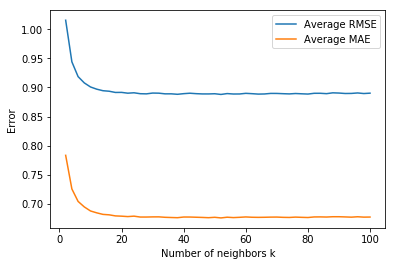

In [10]:
## QUESTION 10
print("-------------Question 10-------------")
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate

RMSE_list = []
MAE_list = []
k_list = np.arange(2,102,2)
for k in k_list:
    # build a model
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson', 'user_based':True}) 
    # use the model we built to do 10-fold cross validation and get the validation accuracy for 10 validation sets
    val_accuracy = cross_validate(knn, data_in_ratings, measures=['RMSE', 'MAE'], cv=10, verbose=False)
    # calculate the mean accuracy
    rmse_mean = np.mean(val_accuracy['test_rmse'])
    mae_mean = np.mean(val_accuracy['test_mae'])
    # store the mean into the list
    RMSE_list.append(rmse_mean)
    MAE_list.append(mae_mean)

plt.plot(k_list, RMSE_list, label = "Average RMSE")
plt.plot(k_list, MAE_list, label = "Average MAE")
plt.xlabel('Number of neighbors k')
plt.ylabel('Error')
plt.legend()
plt.show()

RMSE:
 [1.0154448333277992, 0.9440207190489105, 0.9186546692399855, 0.9078456825126814, 0.9008864681059711, 0.8971044942026705, 0.8944616243301475, 0.893569413899951, 0.8914826566827261, 0.8915750732573914, 0.8902097921347885, 0.8908981128202391, 0.8893219241091652, 0.8890516988931768, 0.8904252573976874, 0.8902308514762259, 0.8890858266156499, 0.889110518507484, 0.8883173746536024, 0.8893950764572445, 0.8901346892344915, 0.88939296840042, 0.8889419330694659, 0.8889285186425555, 0.889257309452885, 0.8880654609204145, 0.8895373714193964, 0.888794004979783, 0.8888690388248024, 0.889946080491588, 0.8893702686747336, 0.8886550715839816, 0.8888738879976428, 0.88981796234657, 0.8897728523474555, 0.8893419658372567, 0.8889709486669239, 0.889640932526288, 0.8891598600687394, 0.8887221332784714, 0.890013247984567, 0.8900385584431356, 0.8893914851904003, 0.8908233158176289, 0.8904349402851054, 0.8896839588515222, 0.8898122706807922, 0.8906095135399971, 0.8896128782346505, 0.8902346747228911]
MAE

Text(0.5, 1.0, 'average MAE vs. k')

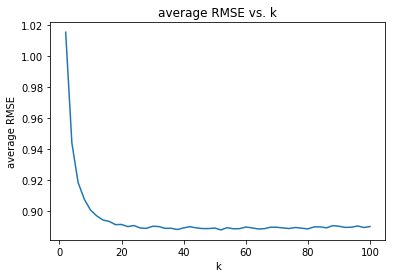

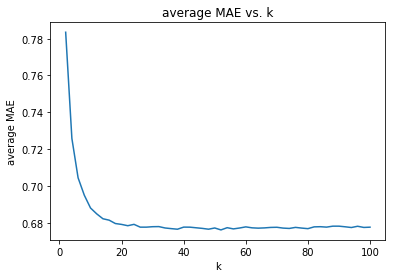

In [11]:
print('RMSE:\n', RMSE_list)
print('MAE:\n', MAE_list)

plt.figure()
plt.plot(k_list,RMSE_list)
plt.xlabel('k')
plt.ylabel('average RMSE')
plt.title('average RMSE vs. k')

plt.figure()
plt.plot(k_list,MAE_list)
plt.xlabel('k')
plt.ylabel('average MAE')
plt.title('average MAE vs. k')

In [12]:
print("-------------Question 11-------------")
print("From the figures above, we can see that the minimum k for which average RMSE and average MAE converges to a steady-state value, is k=20.")

-------------Question 11-------------
From the figures above, we can see that the minimum k for which average RMSE and average MAE converges to a steady-state value, is k=20.


In [13]:
print("-------------Question 12-------------")
from collections import Counter
from surprise.model_selection import KFold
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import accuracy

def trimPopular(data):
    movies_ratings = Counter([x[1] for x in data])
    trimmed_data = [x for x in data if movies_ratings[x[1]] > 2]
    return trimmed_data

k_list = range(2,100,2)
avg_RMSE = []
kf = KFold(n_splits=10)

for k in k_list:
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    k_RMSE = []
    
    for trainset, testset in kf.split(data_in_ratings):
        knn.fit(trainset)
        predictions = knn.test(trimPopular(testset))
        k_RMSE.append(accuracy.rmse(predictions, verbose=False))
        
    avg_RMSE.append(np.mean(k_RMSE))

-------------Question 12-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Minimum average RMSE = 0.854806 (for k = 22)


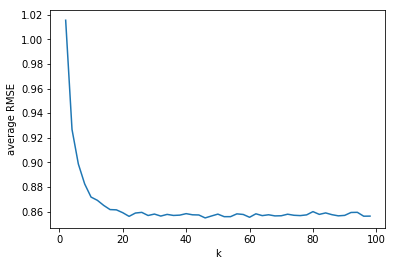

In [14]:
plt.figure()
plt.plot(k_list,avg_RMSE)
plt.xlabel('k')
plt.ylabel('average RMSE')
print('Minimum average RMSE = %f (for k = %d)' %(np.min(avg_RMSE),np.argmin(avg_RMSE)))

In [15]:
print("-------------Question 13-------------")
from collections import Counter
from surprise.model_selection import KFold
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import accuracy

def trimUnpopular(data):
    movies_ratings = Counter([x[1] for x in data])
    trimmed_data = [x for x in data if movies_ratings[x[1]] <= 2]
    return trimmed_data

k_list = range(2,100,2)
avg_RMSE = []
kf = KFold(n_splits=10)

for k in k_list:
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    k_RMSE = []
    
    for trainset, testset in kf.split(data_in_ratings):
        knn.fit(trainset)
        predictions = knn.test(trimUnpopular(testset))
        k_RMSE.append(accuracy.rmse(predictions, verbose=False))
        
    avg_RMSE.append(np.mean(k_RMSE))

-------------Question 13-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

In [16]:
print("-------------Question 14-------------")
from collections import Counter
from surprise.model_selection import KFold
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import accuracy
from collections import defaultdict


def trimHighVar(data):
    # Build ratings matrix
    movies_ratings = defaultdict(list)
    for x in data:
        movies_ratings[x[1]].append(x[2])
    
    trimmed_data = [x for x in data if len(movies_ratings[x[1]]) >= 5 and np.var(movies_ratings[x[1]]) >= 2.0]
    return trimmed_data
"""
ratingMatrix = {}
for row in data_in_ratings.raw_ratings:
    if row[1] not in ratingMatrix:
        ratingMatrix[row[1]] = []
    ratingMatrix[row[1]].append(row[2])

variance = {}
for movie in ratingMatrix:
    variance[movie] = np.var(ratingMatrix[movie])

#movies that have high variance
highVar_movies = [x for x in ratingMatrix if len(ratingMatrix[x]) >= 5 and variance[x] >= 2]
"""
    
k_list = range(2,100,2)
avg_RMSE = []
kf = KFold(n_splits=10)

for k in k_list:
    knn = KNNWithMeans(k=k, sim_options = {'name':'pearson'}) 
    k_RMSE = []
    
    for trainset, testset in kf.split(data_in_ratings):
        knn.fit(trainset)
        #trimHighVar = [x for x in testset if x[1] in highVar_movies]
        predictions = knn.test(trimHighVar(testset))
        k_RMSE.append(accuracy.rmse(predictions, verbose=False))
        
    avg_RMSE.append(np.mean(k_RMSE))

-------------Question 14-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matri

Minimum average RMSE =  1.3580514302125546


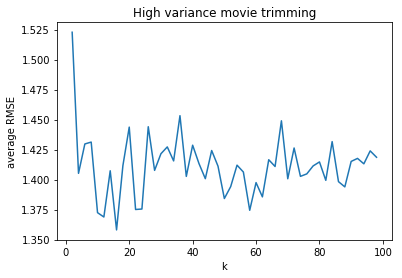

In [25]:
plt.figure()
plt.plot(k_list,avg_RMSE)
plt.xlabel('k')
plt.ylabel('average RMSE')
plt.title('High variance movie trimming')
#print('Minimum average RMSE = %f (for k = %d)' %(np.min(avg_RMSE),np.argmin(avg_RMSE)*2+2))
print('Minimum average RMSE = ', np.min(avg_RMSE))

-------------Question 15-------------
Computing the pearson similarity matrix...
Done computing similarity matrix.


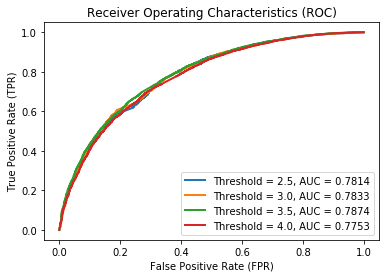

In [26]:
print("-------------Question 15-------------")
from sklearn.metrics import roc_curve, auc
from surprise.model_selection import train_test_split
from surprise import KNNWithMeans

trainset, testset = train_test_split(data_in_ratings, test_size=0.1, random_state=0)
thresholds = [2.5,3,3.5,4]
knn = KNNWithMeans(k=20, sim_options = {'name':'pearson'}) 
knn.fit(trainset)
predictions = knn.test(testset) #list of prediction object: contains attribute r_ui (true rating) and est (estimated rating)
true_ratings = np.array([i.r_ui for i in predictions])
pred_ratings = np.array([i.est for i in predictions])

plt.figure()
for t in thresholds: 
    y_true = true_ratings>=t
    y_pred = pred_ratings
    FPR, TPR, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(FPR, TPR)
    #plt.figure()
    plt.plot(FPR, TPR, lw=2, label='Threshold = %0.1f, AUC = %0.4f' % (t,roc_auc))
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc ='lower right')
    plt.title('Receiver Operating Characteristics (ROC)')
    #plt.title('Receiver Operating Characteristics (ROC) for threshold = %0.1f' %t)
    #plt.show()

In [18]:
print("-------------Question 16-------------")
print("")

-------------Question 16-------------


-------------Question 17-------------


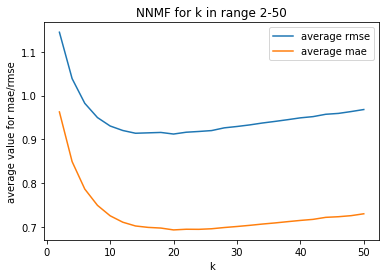

In [40]:
print("-------------Question 17-------------")

from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import matrix_factorization

ave_rmse = []
ave_mae = []

# k from 2 to 50 in step sizes of 2
k = range(2,52,2)
for i in k :
    result = cross_validate(matrix_factorization.NMF(n_factors=i), data_in_ratings, measures=['rmse', 'mae'], cv=10)
        # Compute and print Root Mean Squared Error
    ave_rmse.append(np.mean(result['test_rmse']))
    ave_mae.append(np.mean(result['test_mae']))

plt.plot(k, ave_rmse, label = "average rmse")
plt.plot(k, ave_mae, label = "average mae")
plt.title("NNMF for k in range 2-50")
plt.xlabel("k")
plt.ylabel("average value for mae/rmse")
plt.legend()
plt.show()

In [53]:
print("-------------Question 18-------------")
minRMSE = min(ave_rmse)
kMinRMSE = ave_rmse.index(min(ave_rmse))*2+2
minMAE = min(ave_mae)
kMinMAE = ave_mae.index(min(ave_mae))*2+2
print("When k is %d, the minimum RMSE is %f" % (kMinRMSE, minRMSE))
print("When k is %d, the minimum MAE is %f" % (kMinMAE, minMAE))
print("The optimal number of latent factors is 20 and the movie genres is 18. The are not the same but very close")



-------------Question 18-------------
When k is 20, the minimum RMSE is 0.912128
When k is 20, the minimum MAE is 0.692840
The optimal number of latent factors is 20 and the movie genres is 18. The are not the same but very close


In [21]:
print("-------------Question 19-------------")
# k from 2 to 50 in step sizes of 2
k = range(2,52,2)

-------------Question 19-------------


In [22]:
print("-------------Question 20-------------")


-------------Question 20-------------


In [23]:
print("-------------Question 21-------------")


-------------Question 21-------------


In [24]:
print("-------------Question 22-------------")


-------------Question 22-------------
